In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
import time
warnings.filterwarnings("ignore")


In [2]:
heart = pd.read_csv('dataset/cardio_train_kaggle.csv', delimiter=';')
#heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [3]:
dataset = heart

In [4]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [5]:
dataset

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [6]:
dataset = dataset.drop('id', axis=1)
dataset["age"] = round(dataset["age"] / 365)

In [7]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [8]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

## Train the Support Vector Classifier

In [9]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    roc_10 = []
    cpu_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(1):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        roc_list = []
        cpu = []
        
        for train_ix, test_ix in kfold.split(X, y):

            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            t0= time.time()
            if (param == 0):
                model = SVC(probability=True)
                
            else:
                model = SVC(C=param['C'], gamma = param['gamma'], kernel= param['kernel'],probability=True )

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            #print(predictions)
            #probs = model.predict_proba(X_test)
            #print(probs)
            #probs = probs[:, 1]
            t1 = time.time() - t0
                        
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            #roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        #roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)
   
    accu = sum(accuracy_10)/1
    pre = sum(precision_list_10)/1
    spec = sum(specificity_10)/1
    rec =  sum(recall_list_10)/1
    f1 =  sum(f1_list_10)/1
    #roc = sum(roc_10)/1
    cpu = sum(cpu_10)/1
    
    return([accu,pre,spec,rec,f1,cpu])



from sklearn.model_selection import cross_validate
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
model = SVC()
list_pre = []
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'roc_auc': 'roc_auc'}
score = cross_validate(model,scaled_features,y,cv=10, scoring =scoring)
print(score['test_accuracy'].mean())


In [10]:
dict_SV = {}

## First Model without preprocessing 

In [11]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

#from collections import defaultdict
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = 0
X=scaled_features
result = calculate_model(param,X,y)
dict_SV['SVM'] = result
dict_SV



{'SVM': [72.79428571428572,
  72.88225962901313,
  74.24569715896516,
  72.79428571428572,
  72.7692235427964,
  78.76474552571365,
  536.5213531017304]}

## Hypertune model using grid search

## PCA

## Feature Importance

## Permutation Importance


## Sequential Forward Selection

## RFE

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   bmi          70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 5.9 MB


## K-means

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)


model = KMeans()
#visualizer = KElbowVisualizer(model, k=(1,12)).fit(scaled_features)
#visualizer.show()

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0).fit(scaled_features)

In [13]:
y= kmeans.predict(scaled_features)

In [14]:
df = pd.DataFrame(scaled_features , columns= ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
#df['Cluster'] = y
df.head()

age    gender    height    weight     ap_hi     ap_lo  cholesterol  \
0 -0.493505  1.364055  0.443452 -0.847873 -0.122182 -0.088238    -0.539322   
1  0.245566 -0.733108 -1.018168  0.749831  0.072610 -0.035180     2.400793   
2 -0.197877 -0.733108  0.078047 -0.708942  0.007679 -0.141297     2.400793   
3 -0.789134  1.364055  0.565254  0.541435  0.137541  0.017879    -0.539322   
4 -0.789134 -0.733108 -1.018168 -1.264666 -0.187113 -0.194356    -0.539322   

      gluc     smoke      alco    active  
0 -0.39572 -0.310879 -0.238384  0.494167  
1 -0.39572 -0.310879 -0.238384  0.494167  
2 -0.39572 -0.310879 -0.238384 -2.023607  
3 -0.39572 -0.310879 -0.238384  0.494167  
4 -0.39572 -0.310879 -0.238384 -2.023607

In [16]:
scaled_features = standardise(X)
#Train-test split

param =0
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
result
dict_SV['kmeans_2_clusters'] = result

In [17]:
dict_SV

{'SVM': [72.79428571428572,
  72.88225962901313,
  74.24569715896516,
  72.79428571428572,
  72.7692235427964,
  78.76474552571365,
  536.5213531017304],
 'kmeans_2_clusters': [99.7314285714286,
  99.73163087486704,
  99.82537522219778,
  99.7314285714286,
  99.73146454603547,
  99.99765911409266,
  37.41459753513336]}

In [16]:
import shap


In [17]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[15:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|===================| 69939/70000 [02:29<00:00]        

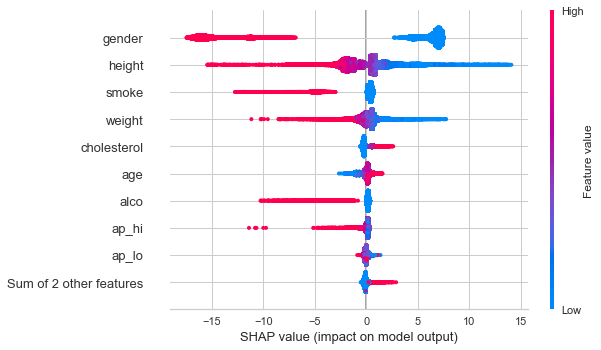

In [20]:
shap.plots.beeswarm(shap_values)

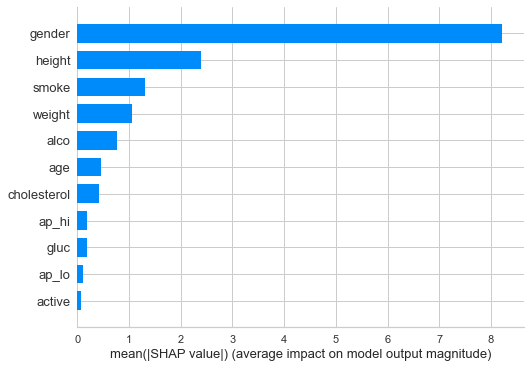

In [26]:
shap_values = shap.TreeExplainer(model).shap_values(df)
shap.summary_plot(shap_values, df, plot_type="bar")

### ideal number of clusters

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,init='k-means++', random_state=0).fit(scaled_features)
#y= kmeans.predict(scaled_features)

In [166]:
patient = pd.DataFrame(df.index)
cluster_no = pd.DataFrame(kmeans.labels_)
df_4= pd.DataFrame()
#Concatenating the patient ids with the assigned cluster lables
df_4 = pd.concat([patient,cluster_no], axis =1)
df_4.columns = ["patient", "cluster no"]

In [167]:
df_4

patient  cluster no
0            0           6
1            1           0
2            2           2
3            3           6
4            4           2
...        ...         ...
69995    69995           5
69996    69996           1
69997    69997           4
69998    69998           2
69999    69999           0

[70000 rows x 2 columns]

In [168]:
import xgboost
import shap
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[19:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|===================| 69477/70000 [02:10<00:00]        

In [169]:
y_pred = model.predict(df)
y_pred = pd.DataFrame(y_pred, index= df.index, columns = ["target"])
df_4 = df_4.set_index("patient")
cluster_df = pd.concat([df_4, y_pred], axis = 1)

In [170]:
cluster_df

cluster no  target
0               6       0
1               0       1
2               2       1
3               6       1
4               2       0
...           ...     ...
69995           5       0
69996           1       1
69997           4       1
69998           2       1
69999           0       0

[70000 rows x 2 columns]

In [171]:
group = (100 * cluster_df[cluster_df["target"]==1].groupby(by = ["cluster no","target"]).size()/len(df_4.index))
group = group.reset_index(level = 1, drop = True)
group = pd.DataFrame(group, columns  = ["Disease Percentage"])
group

Disease Percentage
cluster no                    
0                    18.134286
1                     6.677143
2                     8.322857
3                     0.010000
4                     2.395714
5                     2.512857
6                     8.187143

In [175]:
y= kmeans.predict(scaled_features)

In [34]:
import xgboost
model = xgboost.XGBClassifier().fit(df, y)

# compute SHAP values
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

[10:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|===================| 489592/490000 [07:21<00:00]        

In [35]:
y

array([6, 0, 2, ..., 4, 2, 0])

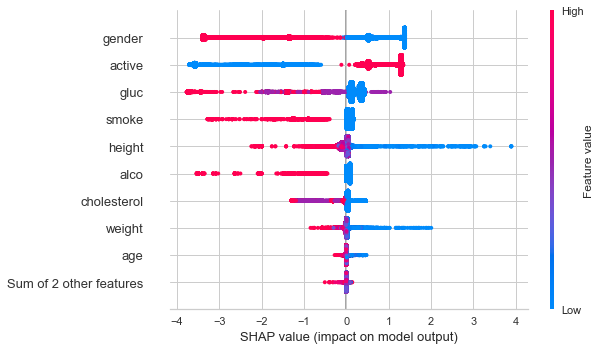

In [36]:
shap.plots.beeswarm(shap_values[:,:,0])

In [ ]:
scaled_features = standardise(X)
#Train-test split

param =0
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
result
dict_SV['kmeans_ideal_clusters'] = result

In [188]:
dict_SV

{'SVM': [72.79428571428572,
  72.88225962901313,
  74.24569715896516,
  72.79428571428572,
  72.7692235427964,
  78.76474552571365,
  536.5213531017304],
 'kmeans_2_clusters': [99.71428571428571,
  99.7145599137962,
  99.8145121416715,
  99.71428571428571,
  99.71432825221221,
  28.221971964836122],
 'kmeans_ideal_clusters': [99.63142857142857,
  99.62298438878426,
  99.49399792167371,
  99.63142857142857,
  99.6269672462665,
  33.26731905937195]}

In [ ]:


X = dataset[['smoke','alco','gender','height','age','weight']].values

#X = dataset[['smoke','active','gender','height','age','gluc']].values

param =0
#print(param)

X=standardise(X)
result = calculate_model(param,X,y)
result


In [19]:
dict_SV['kmeans+Shap'] = result

In [184]:
dict_SV

{'SVM': [72.79428571428572,
  72.88225962901313,
  74.24569715896516,
  72.79428571428572,
  72.7692235427964,
  536.5213531017304],
 'kmeans_2_clusters': [99.71428571428571,
  99.7145599137962,
  99.8145121416715,
  99.71428571428571,
  99.71432825221221,
  28.221971964836122],
 'kmeans_ideal_clusters': [99.63142857142857,
  99.62298438878426,
  99.49399792167371,
  99.63142857142857,
  99.6269672462665,
  33.26731905937195]}

In [20]:
df_dict = pd.DataFrame.from_dict(dict_SV,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
SVM                72.794286  72.882260    74.245697  72.794286  72.769224   
kmeans_2_clusters  99.731429  99.731631    99.825375  99.731429  99.731465   
kmeans+Shap        99.812857  99.812932    99.865240  99.812857  99.812867   

                         Roc    CPU_time  
SVM                78.764746  536.521353  
kmeans_2_clusters  99.997659   37.414598  
kmeans+Shap        99.984024   18.930225

In [21]:
# Adding Number of features
df_dict['no_of_features'] = [11,11,6]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
SVM                72.794286  72.882260    74.245697  72.794286  72.769224   
kmeans_2_clusters  99.731429  99.731631    99.825375  99.731429  99.731465   
kmeans+Shap        99.812857  99.812932    99.865240  99.812857  99.812867   

                         Roc    CPU_time  no_of_features  
SVM                78.764746  536.521353              11  
kmeans_2_clusters  99.997659   37.414598              11  
kmeans+Shap        99.984024   18.930225               6